# 01 Markov State Model

In [1]:
using PyPlot
using Revise, MDToolbox
ENV["COLUMNS"] = 100; # display width for MDToolbox
ENV["JULIA_NUM_THREADS"] = 4 # threads used in Julia

┌ Info: Precompiling MDToolbox [7965e2f0-a35b-11e8-0207-19c030dd2def]
└ @ Base loading.jl:1278


4

In [2]:
#t = load("../ak.pdb")
t = load("data/1yrf.pdb")

1x582 TrjArray{Float64,Int64}
|                            |                            |  …                              |
| 1LEU                       | 1LEU                       |  …   35PHE                      |
| 1N                         | 2H1                        |  …   582OXT                     |
|    -7.40     9.81     7.91 |    -8.22     9.66     7.60 |  …     -14.90    16.49     8.30 |

In [3]:
index = select_atom(t, "atomname CA")

35-element Array{Int64,1}:
   5
  24
  35
  47
  62
  74
  94
 116
 126
 142
 162
 169
 186
   ⋮
 365
 387
 404
 421
 438
 457
 479
 501
 516
 538
 545
 564

In [4]:
t[:, index]

1x35 TrjArray{Float64,Int64}
|                            |                            |  …                              |
| 1LEU                       | 2SER                       |  …   35PHE                      |
| 1CA                        | 2CA                        |  …   35CA                       |
|    -6.43     9.30     6.99 |    -2.63     9.12     7.22 |  …     -15.68    14.56     7.08 |

In [5]:
#t = load("../ak.nc", index=index, top=t)
t = load("data/all_stride100.nc", index=index, top=t)

325001x35 TrjArray{Float64,Int64}
|                            |                            |  …                              |
| 1LEU                       | 2SER                       |  …   35PHE                      |
| 1CA                        | 2CA                        |  …   35CA                       |
|    -6.43     9.30     6.99 |    -2.63     9.12     7.22 |  …     -15.68    14.56     7.08 |
|    45.52   -13.34    39.18 |    49.36   -13.09    38.64 |         41.88     2.56    46.47 |
|    47.60   -14.15    34.86 |    51.09   -13.00    36.01 |         42.84     5.06    48.31 |
|    45.56   -13.17    36.88 |    49.31   -12.53    37.23 |         41.19     1.18    47.38 |
|    46.26   -12.63    36.16 |    50.06   -12.71    36.70 |         40.38     3.74    46.40 |
|    49.31   -16.29    35.70 |    51.93   -13.69    34.74 |  …      40.41     2.54    47.74 |
|    49.95   -16.06    34.63 |    52.57   -13.36    35.52 |         41.14     4.71    47.48 |
|    45.35   -14.80    37.

In [6]:
?Style

search: IndexStyle printstyled ksdensity_serial

Couldn't find Style
Perhaps you meant Some, Sys, table, title, @time, angle, ctime, eltype or htol


No documentation found.

Binding `Style` does not exist.


In [7]:
using Bio3DView
viewstruc(t[1, :], style=Style("sphere", Dict("color"=> "spectrum")))

HTML{String}("<script type='text/javascript'>/*! jQuery v3.3.1 | (c) JS Foundation and other contributors | jquery.org/license */\n!function(e,t){\"use strict\";\"object\"==typeof module&&\"object\"==typeof module.exports?module.exports=e.document?t(e,!0):function(e){if(!e.document)throw new Error(\"jQuery requires a window with a document\");return t(e)}:t(e)}(\"undefined\"!=typeof window?window:this,function(e,t){\"use strict\";var n=[],r=e.document,i=Object.getPrototypeOf,o=n.slice,a=n.concat,s=n.push,u=n.indexOf,l={},c=l.toString,f=l.hasOwnProperty,p=f.toString,d=p.call(Object),h={},g=function e(t){return\"function\"==typeof t&&\"number\"!=typeof t.nodeType},y=function e(t){return null!=t&&t===t.window},v={type:!0,src:!0,noModule:!0};function m(e,t,n){var i,o=(t=t||r).createElement(\"script\");if(o.text=e,n)for(i in v)n[i]&&(o[i]=n[i]);t.head.appendChild(o).parentNode.removeChild(o)}function x(e){return null==e?e+\"\":\"object\"==typeof e||\"function\"==typeof e?l[c.call(e)]||\"object\":typeof e}var b=\"3.3.1\",w=function(e,t){return new w.fn.init(e,t)},T=/^[\\s\\uFEFF\\xA0]+|[\\s\\uFEFF\\xA0]+\$/g;w.fn=w.prototype={jquery:\"3.3.1\",constructor:w,length:0,toArray:function(){return o.call(this)},get:function(e){return null==e?o.call(this):e<0?this[e+this.length]:this[e]},pushStack:function(e){var t=w.merge(this.constructor(),e);return t.prevObject=this,t},each:function(e){return w.each(this,e)},map:function(e){return this.pushStack(w.map(this,function(t,n){return e.call(t,n,t)}))},slice:function(){return this.pushStack(o.apply(this,arguments))},first:function(){return this.eq(0)},last:function(){return this.eq(-1)},eq:function(e){var t=this.length,n=+e+(e<0?t:0);return this.pushStack(n>=0&&n<t?[this[n]]:[])},end:function(){return this.prevObject||this.constructor()},push:s,sort:n.sort,splice:n.splice},w.extend=w.fn.extend=function(){var e,t,n,r,i,o,a=arguments[0]||{},s=1,u=arguments.length,l=!1;for(\"boolean\"==typeof a&&(l=a,a=arguments[s]||{},s++),\"object\"==typeof a||g(a)||(a={}),s===u&&(a=this,s--);s<u;s++)if(null!=(e=arguments[s]))for(t in e)n=a[t],a!==(r=e[t])&&(l&&r&&(w.isPlainObject(r)||(i=Array.isArray(r)))?(i?(i=!1,o=n&&Array.isArray(n)?n:[]):o=n&&w.isPlainObject(n)?n:{},a[t]=w.extend(l,o,r)):void 0!==r&&(a[t]=r));return a},w.extend({expando:\"jQuery\"+(\"3.3.1\"+Math.random()).replace(/\\D/g,\"\"),isReady:!0,error:function(e){throw new Error(e)},noop:function(){},isPlainObject:function(e){var t,n;return!(!e||\"[object Object]\"!==c.call(e))&&(!(t=i(e))||\"function\"==typeof(n=f.call(t,\"constructor\")&&t.constructor)&&p.call(n)===d)},isEmptyObject:function(e){var t;for(t in e)return!1;return!0},globalEval:function(e){m(e)},each:function(e,t){var n,r=0;if(C(e)){for(n=e.length;r<n;r++)if(!1===t.call(e[r],r,e[r]))break}else for(r in e)if(!1===t.call(e[r],r,e[r]))break;return e},trim:function(e){return null==e?\"\":(e+\"\").replace(T,\"\")},makeArray:function(e,t){var n=t||[];return null!=e&&(C(Object(e))?w.merge(n,\"string\"==typeof e?[e]:e):s.call(n,e)),n},inArray:function(e,t,n){return null==t?-1:u.call(t,e,n)},merge:function(e,t){for(var n=+t.length,r=0,i=e.length;r<n;r++)e[i++]=t[r];return e.length=i,e},grep:function(e,t,n){for(var r,i=[],o=0,a=e.length,s=!n;o<a;o++)(r=!t(e[o],o))!==s&&i.push(e[o]);return i},map:function(e,t,n){var r,i,o=0,s=[];if(C(e))for(r=e.length;o<r;o++)null!=(i=t(e[o],o,n))&&s.push(i);else for(o in e)null!=(i=t(e[o],o,n))&&s.push(i);return a.apply([],s)},guid:1,support:h}),\"function\"==typeof Symbol&&(w.fn[Symbol.iterator]=n[Symbol.iterator]),w.each(\"Boolean Number String Function Array Date RegExp Object Error Symbol\".split(\" \"),function(e,t){l[\"[object \"+t+\"]\"]=t.toLowerCase()});function C(e){var t=!!e&&\"length\"in e&&e.length,n=x(e);return!g(e)&&!y(e)&&(\"array\"===n||0===t||\"number\"==typeof t&&t>0&&t-1 in e)}var E=function(e){var t,n,r,i,o,a,s,u,l,c,f,p,d,h,g,y,v,m,x,b=\"sizzle\"+1*new Date,w=e.document,T=0,C=0,E=ae(),k=ae(),S=ae(),D=function(e,t){return e===t&&(f=!0),0},N

# Extract features and dimensional reduction

First, we compute distance-map vectors for each fram by calling `compute_distancemap()` function

In [8]:
X = compute_distancemap(t)

325001×528 Array{Float64,2}:
 7.89933  5.85188   5.94069   9.49252  10.2384  …  5.26846  6.27684  7.49441   9.66232  8.88368
 8.50817  7.00025   9.64637  12.595    13.5787     6.74683  6.47582  8.17173   9.44661  8.55033
 8.04062  6.47848   9.32129  11.8972   13.1739     5.88217  4.61305  7.75496   8.00677  7.87567
 8.24729  6.7526    9.33815  12.149    12.5471     6.40686  8.33347  7.9987   10.943    9.66315
 8.12258  5.82863   8.14704  10.921    11.5195     6.4681   7.49529  8.05406  10.0904   8.81301
 9.05469  8.69891  12.0555   14.0325   15.4729  …  6.86724  8.59181  8.47824  11.1277   9.58356
 8.29563  7.24198   9.90614  12.2051   13.4218     6.4855   7.12913  8.21236  10.1123   9.06676
 8.77351  7.84755  10.6097   13.1113   13.3386     6.62716  6.32367  8.25358   9.06616  8.43631
 7.6784   6.87895  10.0293   12.3521   13.6506     6.55582  7.37944  8.33597  10.3802   8.93563
 8.87195  7.54684   9.67746  12.5864   13.5665     6.50601  6.36308  8.2513    9.546    8.67297
 8.43729  6

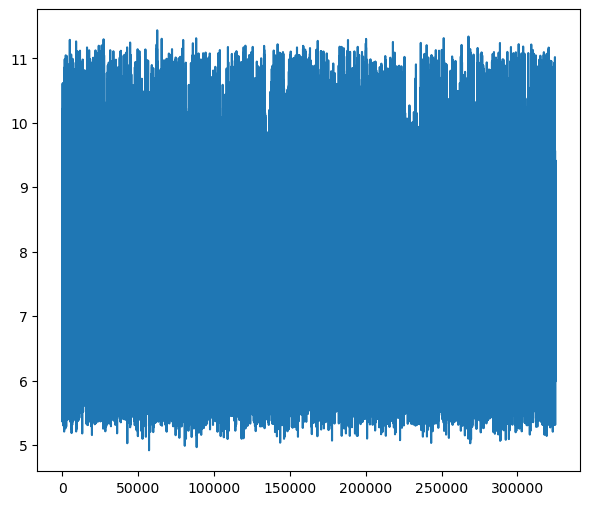

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd2b8225610>

In [9]:
#pyplot(size=(500,400))
#plot(X[:, 1], framestyle=:box)
fig, ax = subplots(figsize=(7,6))
ax.plot(X[:, 1])

In [10]:
#F = pca(X, k=10)
F = tica(X, 100)

(projection = [-0.18033379647412212 -0.04373676333206317 … -0.046867970751247344 -0.027620557460077744; -0.2527873298745924 -0.07750072034750746 … 0.07847181240486475 -0.0011756365507353313; … ; 0.22637331895903212 -0.010899822749266999 … 0.041132811895802486 -0.036955537094417304; 0.13815873354256022 -0.021610254547624125 … -0.3021101718058108 -0.08935273988751893], mode = [-2.733525679537845e-5 0.0005333669848833232 … 0.0023353337072133562 -0.0008827130911553556; -7.169188338870533e-5 -0.0005609749313042141 … -0.0014771148198278487 0.0012375654820736897; … ; -0.009133226519625311 0.0016331665010573468 … -0.0002471504422261057 0.009024819583020309; 0.0005427185357872936 -0.00046396019963738 … -0.0006223841935696338 -0.003177513941048891], variance = [0.9432688803427057, 0.9336574819080925, 0.9009147394119673, 0.8694650840033729, 0.8502762271398945, 0.8024667324419811, 0.7832768093923347, 0.7633893662139476, 0.7402298115374688, 0.7306576337076044  …  -0.08962183050483141, -0.0930527338

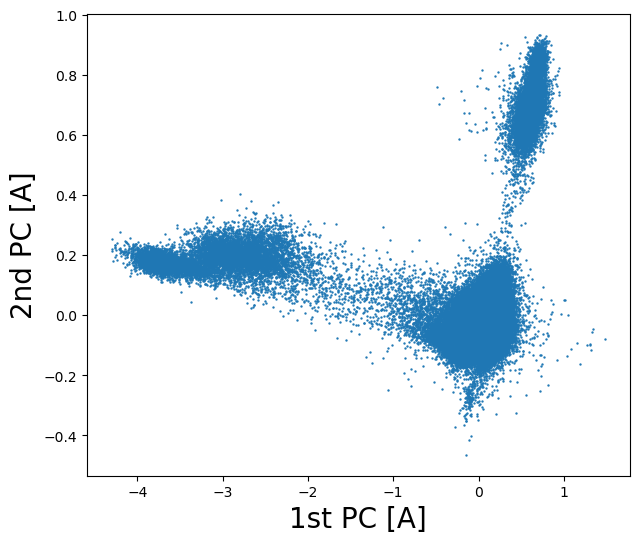

PyObject Text(38.0, 0.5, '2nd PC [A]')

In [12]:
#pyplot(size=(500,400))
#scatter(F.projection[:, 1], F.projection[:, 2], markersize=2.0, color=:black, label=nothing, framestyle=:box)
#xlabel!("1st PC [A]"); ylabel!("2nd PC [A]")

fig, ax = subplots(figsize=(7, 6))
ax.scatter(F.projection[:, 1], F.projection[:, 2], s=0.5)
xlabel("1st PC [A]",fontsize=20)
ylabel("2nd PC [A]",fontsize=20)

# Clustering

In [19]:
F2 = clusterkcenters(F.projection[:, 1:10], 50)

1 iteration  distance_max = 2.661974  kcluster = 50
2 iteration  distance_max = 2.615872  kcluster = 50
3 iteration  distance_max = 2.567137  kcluster = 50
4 iteration  distance_max = 2.567137  kcluster = 50
5 iteration  distance_max = 2.567137  kcluster = 50
6 iteration  distance_max = 2.565012  kcluster = 50
7 iteration  distance_max = 2.565012  kcluster = 50
8 iteration  distance_max = 2.565012  kcluster = 50
9 iteration  distance_max = 2.565012  kcluster = 50
10 iteration  distance_max = 2.541744  kcluster = 50


(indexOfCluster = [1, 38, 38, 38, 38, 38, 38, 38, 38, 38  …  1, 1, 1, 1, 1, 1, 1, 32, 1, 32], center = [0.15047671499588006 0.012647765089657861 … 0.2117852566584275 0.36641032470186213; 0.2577097794105073 -0.01891551189008648 … 0.1744416323521485 -0.34696402442243424; … ; -2.6447187646210395 0.24922531751099958 … 0.8358147854126391 -0.8147505086756257; -1.5844257270646316 0.02435941478573871 … 0.13113579916404866 0.1527641914362497], distanceFromCenter = [2.1069216140097384; 2.4263467305633326; … ; 1.431012687877401; 3.9023473433740126])

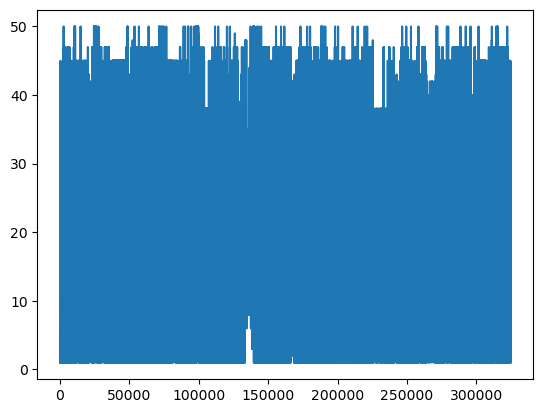

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fd2a9a07f70>

In [20]:
plot(F2.indexOfCluster)

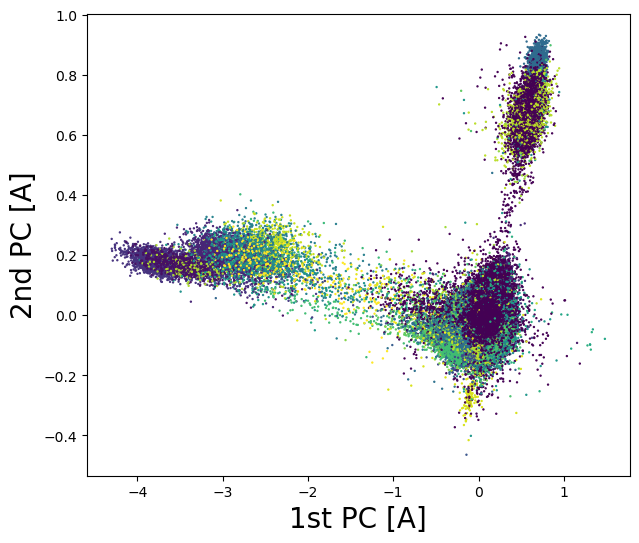

PyObject Text(38.0, 0.5, '2nd PC [A]')

In [21]:
#gr(size=(500,400))
#scatter(F.projection[10:10:end, 1], F.projection[10:10:end, 2], markersize=2.0, color=F2.indexOfCluster[10:10:end], label=nothing, framestyle=:box)
#        markerstrokewidth = 0.1)
#xlabel!("1st PC [A]"); ylabel!("2nd PC [A]")

fig, ax = subplots(figsize=(7, 6))
ax.scatter(F.projection[:, 1], F.projection[:, 2], s=0.5, c=F2.indexOfCluster)
xlabel("1st PC [A]",fontsize=20)
ylabel("2nd PC [A]",fontsize=20)

In [22]:
GC.gc()

# Estimation of transition probability matrix from data

Likelihood function of observing the data given a transition probability matrix $T$

\begin{aligned}
  L(T) =  P({\rm data} | T) = \prod_i \prod_j T_{ij}^{C_{ij}}
\end{aligned}

Here, $C_{ij}$ is a counting matrix whose elements represents the number of transitions between states obesrved in the given data

First, we compute the counting matrix from the result of the clustering

In [23]:
# compute counting matrix
C = msmcountmatrix(F2.indexOfCluster, tau=100)

50×50 Array{Int64,2}:
 156122   10    0   21   0     0   736     0   0  …  768  1326    0  3305   20  1764   8  1  125
     29  668    0    0   0     0   166     0   0       4     1    0     0    0     0   0  0    0
      0    0  356    0   0     0     0     0   1       0     0  116     0    0     0   0  0   16
     37    0    0  424   0     0     0     0   0       6     0    0     0    0     0   0  0    0
      0    0    0    0  66     0     0     0   0       0     1    0     0    0     0   0  0    0
      0    0    0    0   0  1006     0   100   3  …    0     0    0     0    6     0  10  0    0
    876  206    0    0   0     0  2655     0   0      76    30    0    15    0    25   0  0    1
      0    0    0    0   0    98     0  2573   0       0     0    1     0    0     0   0  0    2
      0    0   36    0   0     8     0     0  78       0     0   27     0    0     0   0  0    0
      0    0    0    0   0     0     0     0   0       0     0    0     0    0     0   0  0   11
    247 

Then, we estimate the transition probability matrix by maximizing the likelihood function given above

In [24]:
T = msmtransitionmatrix(C)

50×50 Array{Float64,2}:
 0.829496    0.000103602  0.0          0.000154074  …  3.98468e-5   5.3129e-6   0.00081553
 0.0116562   0.399282     0.0          0.0             0.0          0.0         0.0
 0.0         0.0          0.623468     0.0             0.0          0.0         0.0140105
 0.0218547   0.0          0.0          0.319517        0.0          0.0         0.0
 0.0         0.0          0.0          0.0             0.0          0.0         0.0
 0.0         0.0          0.0          0.0          …  0.0109047    0.0         0.0
 0.13508     0.0311709    0.0          0.0             0.0          0.0         0.000251378
 0.0         0.0          0.0          0.0             0.0          0.0         0.000716846
 0.0         0.0          0.0989305    0.0             0.0          0.0         0.0
 0.0068496   0.0          0.0          0.0             0.0          0.0         0.0684931
 0.088179    0.0          0.0          0.0125965    …  0.0          0.0         0.000203169
 0.032571

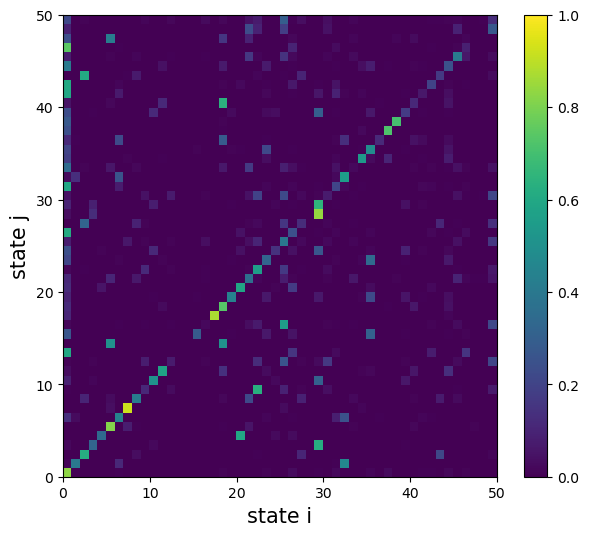

PyObject Text(30.000000000000007, 0.5, 'state j')

In [32]:
#pyplot(size=(500,400))
#heatmap(T, aspect_ratio=:equal, color=:thermal, clim=(0, 1))
#xlabel!("state i"); ylabel!("state j")

fig, ax = subplots(figsize=(7, 6))
levels = 0:0.1:1
p = ax.pcolor(T, vmin=0, vmax=1)
cbar = fig.colorbar(p, ax=ax)
#ax.colorbar()
xlabel("state i",fontsize=15)
ylabel("state j",fontsize=15)

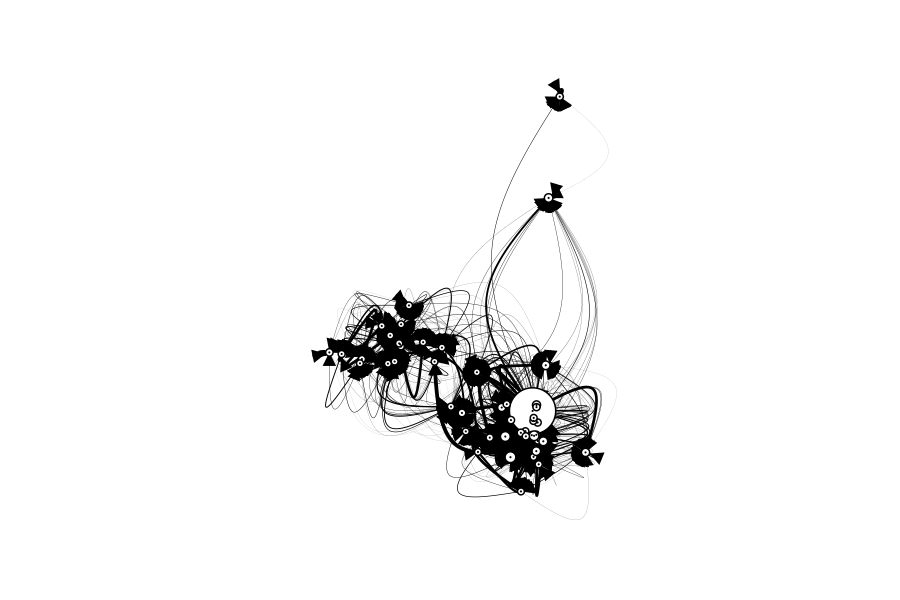

In [35]:
msmplot(T, x=F2.center[:, 1], y=F2.center[:, 2], filename="msm.png", dpi=150)

# Validation

In [36]:
tau = 1:500
implied_time = msmimpliedtime(F2.indexOfCluster, tau)

500×49 Array{Union{Missing, Float64},2}:
   66.3548    45.6722    35.3362    33.0945    24.4328  …  0.569061  0.542511  0.466291  0.409997
  117.238     78.5004    62.01      57.7602    43.3832     1.2082    1.08469   1.01974   0.651297
  172.147    109.572     86.2607    78.9603    60.8903     1.17671   1.14056   0.922277   missing
  210.564    135.51     104.527     98.9909    78.6498     1.78806    missing   missing   missing
  250.483    160.846    121.215    115.48      94.8358     1.09129    missing   missing   missing
  298.568    188.658    139.827    134.752    106.863   …  2.20348   1.96389    missing   missing
  331.132    208.204    157.285    149.006    121.655      2.9111    2.83738    missing   missing
  379.718    238.134    169.541    162.876    133.624      2.70139    missing   missing   missing
  411.594    253.36     184.197    178.5      146.767      4.2754    3.28291   2.70715    missing
  456.955    284.981    197.658    192.328    160.256      3.87662    missing

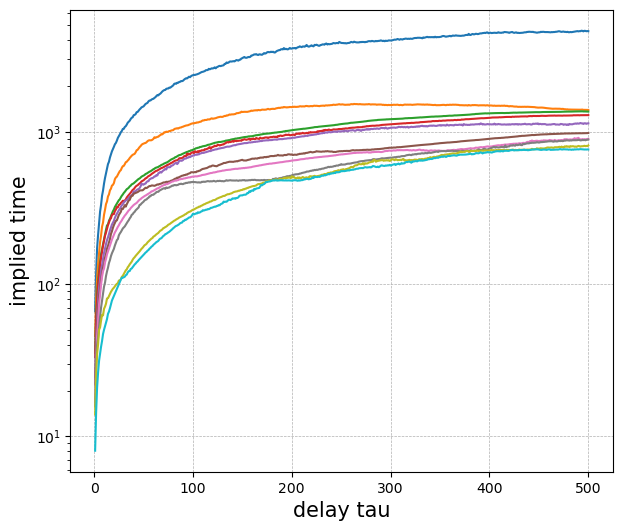

PyObject Text(30.000000000000007, 0.5, 'implied time')

In [38]:
#pyplot(size=(400,300))
#plot(tau, implied_time[:, 1:10], framestyle=:box, yaxis=:log, label=nothing)
#xlabel!("delay tau"); ylabel!("implied time")

fig, ax = subplots(figsize=(7, 6))
p = ax.semilogy(tau, implied_time[:, 1:10])
#cbar = fig.colorbar(p, ax=ax)
#ax.colorbar()
ax.grid(linestyle="--", linewidth=0.5);
xlabel("delay tau",fontsize=15)
ylabel("implied time",fontsize=15)